# Day 10: Applications and Review

Welcome to the final day of our 2-week linear algebra curriculum! Today, we bring everything together by implementing two cornerstone machine learning applications from scratch (or close to it) using NumPy. This will solidify your understanding of how abstract concepts like matrix inversion and eigenvectors become powerful, practical tools.

## Objectives for Today:
- Quickly review the key concepts from the past two weeks.
- Understand and implement the Normal Equation for Linear Regression.
- Apply Principal Component Analysis (PCA) to a dataset.
- Connect the practical application of PCA back to the theory of eigenvalues and eigenvectors.
- Consolidate your understanding of how linear algebra is the backbone of ML.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

## 1. A Quick Review of Key Concepts

Over the last nine days, we've built a solid foundation. Let's recap the journey:

- **Week 1: Fundamentals**
  - **Vectors & Matrices:** The basic data structures for features and datasets.
  - **Core Operations:** Addition, multiplication, dot products, and transposes are the arithmetic of linear algebra.
  - **Special Matrices:** The identity matrix and diagonal matrices are crucial for transformations and theory.

- **Week 2: Advanced Concepts & Applications**
  - **Matrix Inverse:** Key to solving systems of linear equations directly.
  - **Eigenvectors & Eigenvalues:** Revealed the intrinsic directions and scaling factors of linear transformations.
  - **SVD & Vector Spaces:** Provided tools for matrix decomposition and understanding the 'true' dimensionality of data.

Today, we'll see how these pieces fit together to build real algorithms.

## 2. Application 1: Linear Regression with the Normal Equation

Linear regression aims to find the best-fitting line (or hyperplane) through a set of data points. While iterative methods like gradient descent are common, there is a direct analytical solution known as the **Normal Equation**.

The equation finds the optimal parameters `θ` (theta) that minimize the cost function:

### `θ = (XᵀX)⁻¹Xᵀy`

Look closely at the components! It's all operations we've learned:
- `Xᵀ`: The transpose of our input feature matrix.
- `XᵀX`: Matrix multiplication.
- `(XᵀX)⁻¹`: The inverse of the resulting square matrix.

This one equation elegantly combines many of the core concepts we've practiced.

### **Exercise 1: Implement OLS Linear Regression from Scratch**

1.  Create some sample 1D data `x` and `y`.
2.  Construct the design matrix `X` by adding a column of ones for the intercept term.
3.  Use the Normal Equation formula to calculate the optimal `theta` (which will contain the intercept and slope).
4.  Plot the original data points and the regression line you calculated.

Calculated Thete (intercept, slope):
 [[4.21509616]
 [2.77011339]]


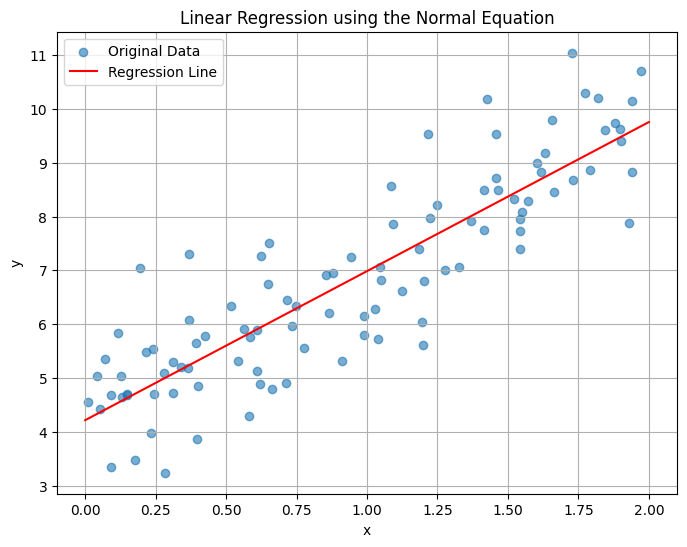

In [6]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

X = np.c_[np.ones((100, 1)), x]

X_transpose = X.T
XTX = X_transpose @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X_transpose @ y
theta = XTX_inv @ XTy

print("Calculated Thete (intercept, slope):\n", theta)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Original Data")

x_line = np.array([0, 2])
X_line = np.c_[np.ones((2, 1)), x_line]
y_line = X_line @ theta

plt.plot(x_line, y_line, "r-", label="Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using the Normal Equation")
plt.legend()
plt.grid(True)
plt.show()

Calculated Theta (intercept, slope):
 [[4.21509616]
 [2.77011339]]


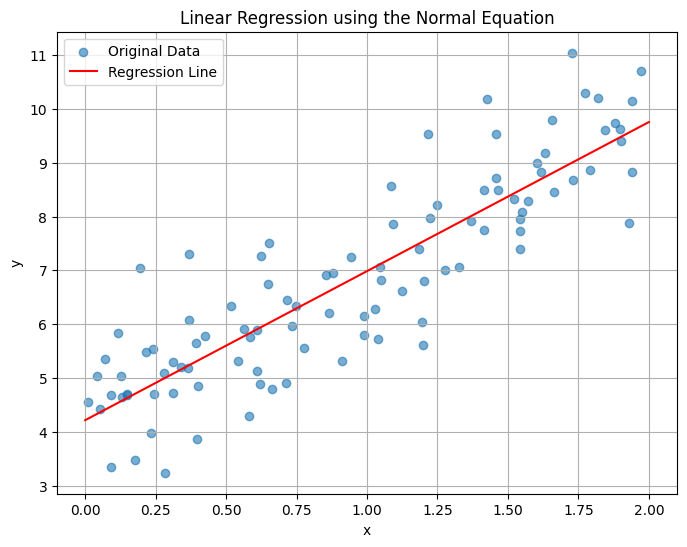

In [ ]:
# 1. Create sample data
np.random.seed(42)  # for reproducibility
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)  # y = 4 + 3x + noise

# 2. Construct the design matrix X (add x0 = 1 to each instance)
# We use np.c_ which is a quick way to concatenate columns
X = np.c_[np.ones((100, 1)), x]

# 3. Calculate theta using the Normal Equation
X_transpose = X.T
XTX = X_transpose @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X_transpose @ y
theta = XTX_inv @ XTy

print("Calculated Theta (intercept, slope):\n", theta)

# 4. Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Original Data")

# To plot the line, we create two points and draw a line between them
x_line = np.array([0, 2])
X_line = np.c_[np.ones((2, 1)), x_line]
y_line = X_line @ theta

plt.plot(x_line, y_line, "r-", label="Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using the Normal Equation")
plt.legend()
plt.grid(True)
plt.show()

The calculated `theta` should be very close to our original parameters of `[4, 3]`. This demonstrates the power of using linear algebra to solve an optimization problem in a single step!

## 3. Application 2: Principal Component Analysis (PCA)

PCA helps us find the directions of maximum variance in our data. As we discussed on Day 7, these directions are the **eigenvectors** of the data's covariance matrix. The magnitude of variance in these directions is given by the corresponding **eigenvalues**.

While we could compute the covariance matrix and then find its eigenvectors manually, high-level libraries like `scikit-learn` provide a `PCA` object that does this for us. Our goal here is to use it and connect its output back to our linear algebra theory.

### **Exercise 2: Apply PCA and Visualize Components**

1.  Generate a 2D dataset that is somewhat correlated.
2.  Use `sklearn.decomposition.PCA` to find the two principal components.
3.  Examine the `components_` and `explained_variance_` attributes of the fitted PCA object.
4.  Plot the original data along with the principal components (eigenvectors) to visualize the directions of maximum variance.

Principal Components (Eigenvectors):
 [[-0.57914715  0.81522302]
 [ 0.81522302  0.57914715]]

Explained Variance (Eigenvalues):
 [1.38820514 0.03732858]


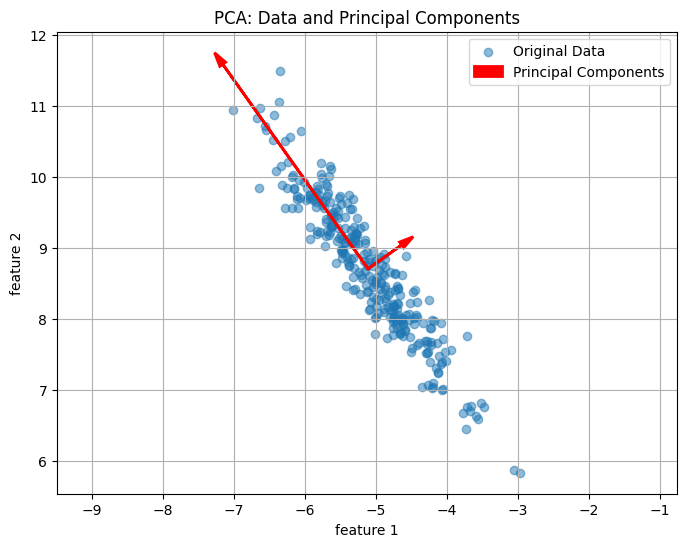

In [8]:
np.random.seed(42)
X_pca, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)

transformation = [[0.6, -0.6], [-0.4, 0.8]]

X_pca = X_pca @ transformation

pca = PCA(n_components=2)
pca.fit(X_pca)

components = pca.components_
explained_variance = pca.explained_variance_

print("Principal Components (Eigenvectors):\n", components)
print("\nExplained Variance (Eigenvalues):\n", explained_variance)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label="Original Data")

mean = pca.mean_
for i, vector in enumerate(components):
    v = vector * 3 * np.sqrt(explained_variance[i])
    plt.arrow(
        mean[0],
        mean[1],
        v[0],
        v[1],
        head_width=0.1,
        head_length=0.2,
        linewidth=2,
        color="r",
        label=f"PC {i + 1}",
    )
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("PCA: Data and Principal Components")
plt.axis("equal")
plt.grid(True)
plt.legend(["Original Data", "Principal Components"])
plt.show()

In [ ]:
# 1. Generate correlated 2D data
np.random.seed(42)
X_pca, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)
# Stretch and rotate the data to make it correlated
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_pca = X_pca @ transformation

# 2. Apply PCA
pca = PCA(n_components=2)
pca.fit(X_pca)

# 3. Examine the results and connect to linear algebra
components = pca.components_
explained_variance = pca.explained_variance_

print("Principal Components (Eigenvectors):\n", components)
print("\nExplained Variance (Eigenvalues):\n", explained_variance)

# 4. Plot the data and components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label="Original Data")

# Plot the eigenvectors (principal components)
mean = pca.mean_  # Eigenvectors are centered at the mean of the data
for i, vector in enumerate(components):
    # Scale the vector by its eigenvalue for better visualization
    v = vector * 3 * np.sqrt(explained_variance[i])
    plt.arrow(
        mean[0],
        mean[1],
        v[0],
        v[1],
        head_width=0.1,
        head_length=0.2,
        linewidth=2,
        color="r",
        label=f"PC {i + 1}",
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PCA: Data and Principal Components")
plt.axis("equal")
plt.grid(True)
# Adding a legend can be tricky with plt.arrow, this is a simple workaround
plt.legend(["Original Data", "Principal Components"])
plt.show()

The plot clearly shows the two red arrows representing the eigenvectors. The longer arrow points in the direction of the highest variance (corresponding to the largest eigenvalue), which is the first principal component. This is a perfect geometric illustration of what eigen-decomposition does for machine learning.

## Course Summary and Final Takeaways

Congratulations! You've completed this two-week practical journey through linear algebra for machine learning.

You have moved from the basic definitions of vectors and matrices to implementing fundamental ML applications. You now have a practical, code-first understanding of how:

- **Data is represented** using vectors and matrices.
- **Matrix operations** can solve complex problems like linear regression directly and efficiently.
- **Eigen-decomposition** is not just an abstract theory but a powerful tool for understanding the structure of data and reducing its dimensionality (PCA).

Linear algebra is the language of machine learning. With the foundation you've built, you are now much better equipped to understand the inner workings of more advanced algorithms and to confidently implement and debug your own models. Keep practicing and exploring!